In [ ]:
#1. load saved CSV you want to look at
#2. Add actual prices for the date the csv tried to predict
#3. Save csv again with actual prices
#4. Load in csv with AP
#5. Append current csv to historic CSV file tracking accuracy & prediction
#6. From there index the information how is needed
#   6.1 Track accuracy & Std over several days + plot
#7. Run test of accuracy for Exp. Dates that are further in the future
#8. set up DF for TF with MACD and other financial Data

In [234]:
#THINGS TO DO

# add new csv to existing DF
# What factors/inputs determine/affect the accuracy & standard deviation?? - inclusion of other Signals?
# --> need to move prediction prices as close together as possible to increase Acc & decrease Std
# plot mean/std over range of Days
# run tensorflow to determine correlation of inputs on output (with other signals) - maybe skip for test run
# write function to do this automatically

# Then first test run

#Analysis Functions needed for:
# 1. New CSVs loaded in to analyze to categorize (by Days_to_Exp) to DF/CSVs with same Days_to_Exp
# 2. Calculating Std and Intervals of CSPS of PP to AP and plot it
# 3. Add Fundamentals of Tickers in separate DF
# 4. Throw All DFs together for first step of X-train/test data --> then add MACD signal and Fundamentals

In [2]:
import pandas as pd
import numpy as np
import datetime
import yfinance as yf
import matplotlib.pyplot as plt
import seaborn as sns

/Users/xpatricklorenzx/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [6]:
#1. Load CSV
Option_Analysis_df = pd.read_csv("Option_Weekly_csv/2020_08_28/Option_Weekly_2020_08_28.csv")

Option_Analysis_df

,Unnamed: 0,Tickers,Todays Price,Option Exp Date,Days_to_Exp,Calls_WOI,Puts_WOI,CPSP,implied Change to prior week,implied %Change to prior week
0,0,AMZN,3399.500000,2020-08-28,0,3537.858756,3173.013418,3391.920621,-7.579379,-0.222956
1,1,AMZN,3399.500000,2020-09-04,7,3563.024464,3154.871713,3399.763363,7.842743,0.231218
2,2,AMZN,3399.500000,2020-09-11,14,3518.855378,3103.492366,3352.710173,-47.053190,-1.384014
3,3,AMZN,3399.500000,2020-09-18,21,3358.554118,2553.526481,3036.543064,-316.167110,-9.430195
4,4,MSFT,228.669998,2020-08-28,0,229.401144,204.371776,219.389397,-9.280601,-4.058513
...,...,...,...,...,...,...,...,...,...,...
155,155,SNE,79.320000,2020-09-18,21,85.210366,79.178392,82.797576,1.307475,1.604458
156,156,MGM,23.895000,2020-08-28,0,21.622618,19.637881,20.828723,-3.066277,-12.832296
157,157,MGM,23.895000,2020-09-04,7,21.861831,19.766338,21.023634,0.194910,0.935777
158,158,MGM,23.895000,2020-09-11,14,21.867537,19.484144,20.914180,-0.109454,-0.520625


In [7]:
#2. Add actual prices at Expiry for the date the csv tried to predict
y = "2020-08-28"

Option_Analysis_loadin = Option_Analysis_df.loc[lambda Option_Analysis_df: \
                                                Option_Analysis_df['Option Exp Date']== y, :]
Option_Analysis_loadin_reset = Option_Analysis_loadin.reset_index(drop=True)
Option_Analysis_loadin_tickers = list(Option_Analysis_loadin_reset["Tickers"])

ticker_t_p_list = []

for x in Option_Analysis_loadin_tickers:
    #To get Actual Price Data of Ticker list
    tickerp = yf.download(x, start= y)
    ticker_p = tickerp['Close']
    ticker_t_p = ticker_p[-1]
    ticker_t_p_list.append(ticker_t_p)

Option_Analysis_loadin_reset["Actual Price @ Expiry"] = ticker_t_p_list

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%********

In [18]:
#Option_Analysis_loadin_reset["Actual Price @ Expiry"] = ticker_t_p_list

In [8]:
Option_Analysis_Final = pd.read_csv("Option_Analysis_Final.csv")

In [9]:
x = Option_Analysis_loadin_reset["Days_to_Exp"].values[0]
y = Option_Analysis_loadin_reset["Option Exp Date"].values[0]

OAF_days = list(Option_Analysis_Final["Days_to_Exp"].values)
OAF_dates = list(Option_Analysis_Final["Option Exp Date"].values)

if np.all(x != OAF_days):
    Option_Analysis_Final = Option_Analysis_Final.append(Option_Analysis_loadin_reset, ignore_index=True)
    print("newest DF added")

else:
    print("not added, already appended")

Option_Analysis_Final

not added, already appended


,Unnamed: 0,Tickers,Todays Price,Option Exp Date,Days_to_Exp,Calls_WOI,Puts_WOI,CPSP,implied Change to prior week,implied %Change to prior week,Actual Price @ Expiry
0,0,AMZN,3299.659912,2020-08-28,4,3476.472251,3090.631492,3322.135947,22.476035,0.681162,3401.800049
1,4,MSFT,213.080002,2020-08-28,4,225.239403,196.510215,213.747728,0.667726,0.313369,228.910004
2,8,AAPL,502.204987,2020-08-28,4,514.672317,444.312497,486.528389,-15.676598,-3.121554,499.230011
3,12,TSLA,2003.000000,2020-08-28,4,2286.390550,1503.056566,1973.056956,-29.943044,-1.494910,2213.399902
4,16,NFLX,487.309998,2020-08-28,4,529.746568,466.169971,504.315929,17.005932,3.489756,523.890015
...,...,...,...,...,...,...,...,...,...,...,...
195,140,JPM,102.695000,2020-08-28,0,103.472172,97.498808,101.082827,-1.612173,-1.569865,102.769997
196,144,GS,209.199997,2020-08-28,0,212.433043,199.401592,207.220463,-1.979534,-0.946240,207.710007
197,148,C,52.240002,2020-08-28,0,53.408824,49.920900,52.013654,-0.226347,-0.433284,52.279999
198,152,SNE,79.320000,2020-08-28,0,84.008089,79.654348,82.266593,2.946593,3.714817,79.389999


In [28]:
Option_Analysis_Final.to_csv('Option_Analysis_Final.csv', index=False)

In [10]:
Option_Analysis_Final["Price @ DtE"] = Option_Analysis_Final["Todays Price"]
Option_Analysis_Final["Expected %Change"] = Option_Analysis_Final["implied %Change to prior week"]
Option_Analysis_Comp = Option_Analysis_Final[["Tickers","Price @ DtE",'Option Exp Date',\
                                              "Days_to_Exp", "Calls_WOI", \
                                              "Puts_WOI","CPSP","Expected %Change",\
                                              "Actual Price @ Expiry"]]

#ANALYSE CALLS
#Option_Analysis_Comp["Abs_Tp_to_Calls_Diff"] =  Option_Analysis_Comp["Calls_WOI"] - \
#Option_Analysis_Comp["Actual Price @ Expiry"]
#Option_Analysis_Comp["%_Tp_to_Calls_Diff"] = (Option_Analysis_Comp["Abs_Tp_to_Calls_Diff"] / \
#                                              Option_Analysis_Comp["Actual Price @ Expiry"])*100
#Option_Analysis_Calls = Option_Analysis_Comp[["Tickers","Actual Price @ Expiry","Days_to_Exp", "Calls_WOI",\
#                                              "Abs_Tp_to_Calls_Diff","%_Tp_to_Calls_Diff"]]
#Option_Analysis_Calls["Prediction_Accuracy_%"] = 100 + Option_Analysis_Calls["%_Tp_to_Calls_Diff"]
#Option_Analysis_Calls

In [59]:
#Option_Analysis_Calls.describe()

In [37]:
#ANALYSE PUTS
#Option_Analysis_Comp["Abs_Tp_to_Puts_Diff"] =  Option_Analysis_Comp["Puts_WOI"] - \
#Option_Analysis_Comp["Actual Price @ Expiry"]
#Option_Analysis_Comp["%_Tp_to_Puts_Diff"] = (Option_Analysis_Comp["Abs_Tp_to_Puts_Diff"] / \
#                                              Option_Analysis_Comp["Actual Price @ Expiry"])*100
#Option_Analysis_Puts =  Option_Analysis_Comp[["Tickers","Actual Price @ Expiry","Days_to_Exp", "Puts_WOI",\
#                                              "Abs_Tp_to_Puts_Diff", "%_Tp_to_Puts_Diff"]]
#Option_Analysis_Puts["Prediction_Accuracy_%"] = 100 + Option_Analysis_Puts["%_Tp_to_Puts_Diff"]
#Option_Analysis_Puts

In [11]:
#--> adjust to S&P move waiting (60 calls - 40 Puts) + Credit interest rate

Option_Analysis_Comp["Abs_AP_to_CPSP_Diff"] = Option_Analysis_Comp["CPSP"]- \
Option_Analysis_Comp["Actual Price @ Expiry"]
Option_Analysis_Comp["%_AP_to_CPSP_Diff"] = (Option_Analysis_Comp["Abs_AP_to_CPSP_Diff"] / \
                                                  Option_Analysis_Comp["Actual Price @ Expiry"])*100
Option_Analysis_Comp["Prediction_Accuracy_%_CPSP"] = 100 + Option_Analysis_Comp["%_AP_to_CPSP_Diff"]
Option_Analysis_Comp["Actual %Change"] = (Option_Analysis_Comp["Actual Price @ Expiry"] -\
Option_Analysis_Comp["Price @ DtE"])/Option_Analysis_Comp["Price @ DtE"]*100

Option_Analysis_Comp["Expected - Actual"] = Option_Analysis_Comp["Expected %Change"] - \
Option_Analysis_Comp["Actual %Change"]

Option_Analysis_CPSP = Option_Analysis_Comp[["Tickers","Days_to_Exp","Price @ DtE","CPSP",\
                                             "Actual Price @ Expiry",\
                                             "Expected %Change", "Actual %Change","Expected - Actual",\
                                             "%_AP_to_CPSP_Diff","Prediction_Accuracy_%_CPSP"]]
Option_Analysis_CPSP

/Users/xpatricklorenzx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/Users/xpatricklorenzx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/Users/xpatricklorenzx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value

,Tickers,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
0,AMZN,4,3299.659912,3322.135947,3401.800049,0.681162,3.095475,-2.414312,-2.341822,97.658178
1,MSFT,4,213.080002,213.747728,228.910004,0.313369,7.429135,-7.115767,-6.623684,93.376316
2,AAPL,4,502.204987,486.528389,499.230011,-3.121554,-0.592383,-2.529171,-2.544243,97.455757
3,TSLA,4,2003.000000,1973.056956,2213.399902,-1.494910,10.504239,-11.999149,-10.858541,89.141459
4,NFLX,4,487.309998,504.315929,523.890015,3.489756,7.506519,-4.016763,-3.736297,96.263703
...,...,...,...,...,...,...,...,...,...,...
195,JPM,0,102.695000,101.082827,102.769997,-1.569865,0.073029,-1.642894,-1.641695,98.358305
196,GS,0,209.199997,207.220463,207.710007,-0.946240,-0.712232,-0.234008,-0.235686,99.764314
197,C,0,52.240002,52.013654,52.279999,-0.433284,0.076564,-0.509848,-0.509458,99.490542
198,SNE,0,79.320000,82.266593,79.389999,3.714817,0.088250,3.626568,3.623370,103.623370


In [10]:
Option_Analysis_CPSP.describe()

,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
count,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000,200.000000
mean,2.000000,337.135788,331.709848,342.547751,-1.161565,1.950959,-3.112523,-2.987585,97.012415
std,1.417762,646.883010,639.104734,656.394466,4.122468,3.067519,4.710520,4.540312,4.540312
min,0.000000,6.480000,6.452612,6.610000,-12.832296,-4.339355,-17.767208,-16.516206,83.483794
25%,1.000000,40.746250,41.390719,40.974999,-3.802678,-0.000899,-5.781981,-5.719863,94.280137
50%,2.000000,113.517498,112.933668,116.895000,-1.594099,1.262125,-3.390959,-3.321926,96.678074
75%,3.000000,290.525002,276.259045,292.812500,1.347840,3.373447,-0.326356,-0.321880,99.678120
max,4.000000,3441.850098,3398.950079,3401.800049,15.183472,12.630886,11.256936,10.831628,110.831628


In [12]:
y = 4

Option_Analysis_CPSP4 = Option_Analysis_CPSP.loc[lambda Option_Analysis_CPSP: \
                                                Option_Analysis_CPSP['Days_to_Exp']== y, :]
Option_Analysis_CPSP4_reset = Option_Analysis_CPSP4.reset_index(drop=True)
Option_Analysis_CPSP4_reset

,Tickers,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
0,AMZN,4,3299.659912,3322.135947,3401.800049,0.681162,3.095475,-2.414312,-2.341822,97.658178
1,MSFT,4,213.080002,213.747728,228.910004,0.313369,7.429135,-7.115767,-6.623684,93.376316
2,AAPL,4,502.204987,486.528389,499.230011,-3.121554,-0.592383,-2.529171,-2.544243,97.455757
3,TSLA,4,2003.000000,1973.056956,2213.399902,-1.494910,10.504239,-11.999149,-10.858541,89.141459
4,NFLX,4,487.309998,504.315929,523.890015,3.489756,7.506519,-4.016763,-3.736297,96.263703
5,FB,4,270.339996,265.308569,293.660004,-1.861148,8.626177,-10.487325,-9.654510,90.345490
6,V,4,205.630005,201.485818,215.710007,-2.015361,4.902009,-6.917370,-6.594126,93.405874
7,NVDA,4,507.549988,504.004003,525.909973,-0.698647,3.617375,-4.316022,-4.165346,95.834654
8,GOOG,4,1586.790039,1561.190231,1644.410034,-1.613308,3.631230,-5.244538,-5.060770,94.939230
9,ZM,4,281.220001,275.693178,299.269989,-1.965302,6.418458,-8.383760,-7.878107,92.121893


In [13]:
Option_Analysis_CPSP4_reset.describe()

,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
count,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,4.0,327.273151,326.591201,342.547751,-0.339265,3.720356,-4.059621,-3.814987,96.185013
std,0.0,632.408697,633.634537,663.092542,4.420089,3.413893,5.536581,5.240751,5.240751
min,4.0,6.625000,6.670251,6.610000,-10.192815,-3.429452,-17.767208,-16.516206,83.483794
25%,4.0,41.728748,42.068486,40.974999,-1.977817,1.665328,-7.399227,-6.856265,93.143735
50%,4.0,112.141850,113.939897,116.895000,-1.383017,3.472354,-4.239617,-4.103652,95.896348
75%,4.0,277.897507,267.516149,292.812500,2.105325,6.859107,-0.954478,-0.914920,99.085080
max,4.0,3299.659912,3322.135947,3401.800049,15.183472,10.504239,11.256936,10.831628,110.831628


In [14]:
y = 3

Option_Analysis_CPSP3 = Option_Analysis_CPSP.loc[lambda Option_Analysis_CPSP: \
                                                Option_Analysis_CPSP['Days_to_Exp']== y, :]
Option_Analysis_CPSP3_reset = Option_Analysis_CPSP3.reset_index(drop=True)
Option_Analysis_CPSP3_reset

,Tickers,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
0,AMZN,3,3348.800049,3368.787538,3401.800049,0.596855,1.582656,-0.985801,-0.970442,99.029558
1,MSFT,3,216.410004,213.823965,228.910004,-1.194972,5.776073,-6.971045,-6.590380,93.409620
2,AAPL,3,499.970001,504.961968,499.230011,0.998453,-0.148007,1.146460,1.148160,101.148160
3,TSLA,3,2011.300049,2053.039128,2213.399902,2.075229,10.048220,-7.972991,-7.244998,92.755002
4,NFLX,3,489.079987,506.017601,523.890015,3.463158,7.117451,-3.654293,-3.411482,96.588518
5,FB,3,281.494995,270.554078,293.660004,-3.886718,4.321572,-8.208290,-7.868258,92.131742
6,V,3,207.884995,200.100507,215.710007,-3.744612,3.764106,-7.508719,-7.236335,92.763665
7,NVDA,3,508.970001,499.953472,525.909973,-1.771525,3.328285,-5.099810,-4.935541,95.064459
8,GOOG,3,1607.949951,1572.333403,1644.410034,-2.215028,2.267489,-4.482517,-4.383130,95.616870
9,ZM,3,290.350006,282.488555,299.269989,-2.707577,3.072148,-5.779726,-5.607456,94.392544


In [15]:
Option_Analysis_CPSP3_reset.describe()

,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
count,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,3.0,331.470189,330.642336,342.547751,-0.274884,2.945751,-3.220636,-3.046643,96.953357
std,0.0,640.867998,644.527078,663.092542,3.965229,3.157668,4.938910,4.722019,4.722019
min,3.0,6.590000,6.857156,6.610000,-7.243333,-4.208275,-15.017904,-13.932158,86.067842
25%,3.0,40.817499,42.020519,40.974999,-3.047779,0.400830,-6.231206,-5.947868,94.052132
50%,3.0,112.502499,113.827772,116.895000,-0.354998,2.312930,-3.899269,-3.748853,96.251147
75%,3.0,286.325684,271.857976,292.812500,2.549496,5.074683,0.079638,0.078780,100.078780
max,3.0,3348.800049,3368.787538,3401.800049,10.410030,10.048220,8.415168,8.250581,108.250581


In [16]:
y = 2

Option_Analysis_CPSP2 = Option_Analysis_CPSP.loc[lambda Option_Analysis_CPSP: \
                                                Option_Analysis_CPSP['Days_to_Exp']== y, :]
Option_Analysis_CPSP2_reset = Option_Analysis_CPSP2.reset_index(drop=True)
Option_Analysis_CPSP2_reset

,Tickers,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
0,AMZN,2,3441.850098,3369.192760,3401.800049,-2.110997,-1.163620,-0.947377,-0.958530,99.041470
1,MSFT,2,221.149994,214.044542,228.910004,-3.212956,3.508935,-6.721891,-6.494020,93.505980
2,AAPL,2,506.089996,504.685432,499.230011,-0.277533,-1.355487,1.077955,1.092767,101.092767
3,TSLA,2,2153.169922,2049.085394,2213.399902,-4.834014,2.797270,-7.631284,-7.423625,92.576375
4,NFLX,2,547.530029,500.520058,523.890015,-8.585825,-4.317574,-4.268251,-4.460852,95.539148
5,FB,2,303.910004,273.090544,293.660004,-10.140982,-3.372709,-6.768273,-7.004515,92.995485
6,V,2,210.259995,201.806733,215.710007,-4.020385,2.592035,-6.612420,-6.445354,93.554646
7,NVDA,2,510.920013,499.499684,525.909973,-2.235248,2.933915,-5.169163,-5.021827,94.978173
8,GOOG,2,1652.380005,1583.851655,1644.410034,-4.147251,-0.482333,-3.664918,-3.682681,96.317319
9,ZM,2,295.269989,282.769900,299.269989,-4.233444,1.354692,-5.588136,-5.513446,94.486554


In [17]:
Option_Analysis_CPSP2_reset.describe()

,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
count,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,2.0,342.652874,331.081634,342.547751,-1.488670,1.863642,-3.352312,-3.222316,96.777684
std,0.0,665.813200,645.105420,663.092542,4.165308,3.779221,4.356478,4.207972,4.207972
min,2.0,6.480000,6.452612,6.610000,-10.140982,-4.339355,-14.748763,-13.592845,86.407155
25%,2.0,40.812501,41.915261,40.974999,-4.168799,-0.663242,-5.777705,-5.753254,94.246746
50%,2.0,112.304996,112.982388,116.895000,-2.398082,1.767758,-3.781492,-3.708556,96.291444
75%,2.0,292.787491,274.036441,292.812500,1.327152,3.560150,-0.832332,-0.822060,99.177940
max,2.0,3441.850098,3369.192760,3401.800049,7.120765,12.630886,7.545551,7.882077,107.882077


In [18]:
y = 1

Option_Analysis_CPSP1 = Option_Analysis_CPSP.loc[lambda Option_Analysis_CPSP: \
                                                Option_Analysis_CPSP['Days_to_Exp']== y, :]
Option_Analysis_CPSP1_reset = Option_Analysis_CPSP1.reset_index(drop=True)
Option_Analysis_CPSP1_reset

,Tickers,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
0,AMZN,1,3400.000000,3398.950079,3401.800049,-0.030880,0.052943,-0.083823,-0.083778,99.916222
1,MSFT,1,226.580002,218.221480,228.910004,-3.688994,1.028335,-4.717329,-4.669313,95.330687
2,AAPL,1,500.040009,505.151236,499.230011,1.022164,-0.161987,1.184150,1.186072,101.186072
3,TSLA,1,2238.750000,2126.619293,2213.399902,-5.008630,-1.132333,-3.876297,-3.920693,96.079307
4,NFLX,1,526.270020,516.236592,523.890015,-1.906517,-0.452240,-1.454277,-1.460883,98.539117
5,FB,1,293.220001,276.686240,293.660004,-5.638688,0.150059,-5.788747,-5.780073,94.219927
6,V,1,211.029999,201.786184,215.710007,-4.380332,2.217698,-6.598030,-6.454881,93.545119
7,NVDA,1,505.130005,508.169902,525.909973,0.601805,4.113786,-3.511981,-3.373214,96.626786
8,GOOG,1,1634.329956,1586.556081,1644.410034,-2.923147,0.616771,-3.539919,-3.518219,96.481781
9,ZM,1,294.679993,287.020199,299.269989,-2.599360,1.557621,-4.156981,-4.093224,95.906776


In [19]:
Option_Analysis_CPSP1_reset.describe()

,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
count,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,1.0,341.875749,335.368303,342.547751,-1.643282,1.194495,-2.837777,-2.762355,97.237645
std,0.0,664.617248,654.753805,663.092542,3.787701,1.863648,4.472690,4.363205,4.363205
min,1.0,6.480000,6.754831,6.610000,-9.606111,-2.575260,-13.679273,-13.077292,86.922708
25%,1.0,40.227500,41.598704,40.974999,-3.915942,-0.000790,-4.851027,-4.864026,95.135974
50%,1.0,117.249996,112.280197,116.895000,-2.474408,1.055542,-3.218674,-3.143313,96.856687
75%,1.0,291.592491,277.530637,292.812500,0.842687,2.246859,-0.121522,-0.119457,99.880543
max,1.0,3400.000000,3398.950079,3401.800049,8.328202,6.761775,9.121970,9.194957,109.194957


In [20]:
y = 0

Option_Analysis_CPSP0 = Option_Analysis_CPSP.loc[lambda Option_Analysis_CPSP: \
                                                Option_Analysis_CPSP['Days_to_Exp']== y, :]
Option_Analysis_CPSP0_reset = Option_Analysis_CPSP0.reset_index(drop=True)
Option_Analysis_CPSP0_reset

,Tickers,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
0,AMZN,0,3399.500000,3391.920621,3401.800049,-0.222956,0.067658,-0.290614,-0.290418,99.709582
1,MSFT,0,228.669998,219.389397,228.910004,-4.058513,0.104957,-4.163470,-4.159105,95.840895
2,AAPL,0,499.390106,508.925926,499.230011,1.909493,-0.032058,1.941551,1.942174,101.942174
3,TSLA,0,2214.641113,2061.053037,2213.399902,-6.935123,-0.056046,-6.879077,-6.882934,93.117066
4,NFLX,0,522.450012,517.557292,523.890015,-0.936495,0.275625,-1.212120,-1.208789,98.791211
5,FB,0,293.010010,288.382232,293.660004,-1.579392,0.221833,-1.801226,-1.797239,98.202761
6,V,0,216.000000,203.829333,215.710007,-5.634568,-0.134256,-5.500312,-5.507706,94.492294
7,NVDA,0,524.625977,513.769699,525.909973,-2.069337,0.244745,-2.314082,-2.308432,97.691568
8,GOOG,0,1642.770020,1598.606745,1644.410034,-2.688342,0.099832,-2.788174,-2.785393,97.214607
9,ZM,0,299.000000,285.969082,299.269989,-4.358167,0.090297,-4.448464,-4.444451,95.555549


In [21]:
Option_Analysis_CPSP0_reset.describe()

,Days_to_Exp,Price @ DtE,CPSP,Actual Price @ Expiry,Expected %Change,Actual %Change,Expected - Actual,%_AP_to_CPSP_Diff,Prediction_Accuracy_%_CPSP
count,40.0,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000,40.000000
mean,0.0,342.406975,334.865767,342.547751,-2.061722,0.030549,-2.092271,-2.091626,97.908374
std,0.0,662.808852,649.879445,663.092542,4.132963,0.170059,4.129696,4.128116,4.128116
min,0.0,6.595000,7.086124,6.610000,-12.832296,-0.712232,-12.685822,-12.704431,87.295569
25%,0.0,41.020000,41.371689,40.974999,-4.239989,-0.033171,-4.305576,-4.302746,95.697254
50%,0.0,116.842449,115.548782,116.895000,-2.062044,0.067468,-2.212357,-2.208943,97.791057
75%,0.0,292.518761,281.543282,292.812500,-0.060208,0.101113,-0.068497,-0.069756,99.930244
max,0.0,3399.500000,3391.920621,3401.800049,8.063714,0.275625,7.974884,7.967806,107.967806


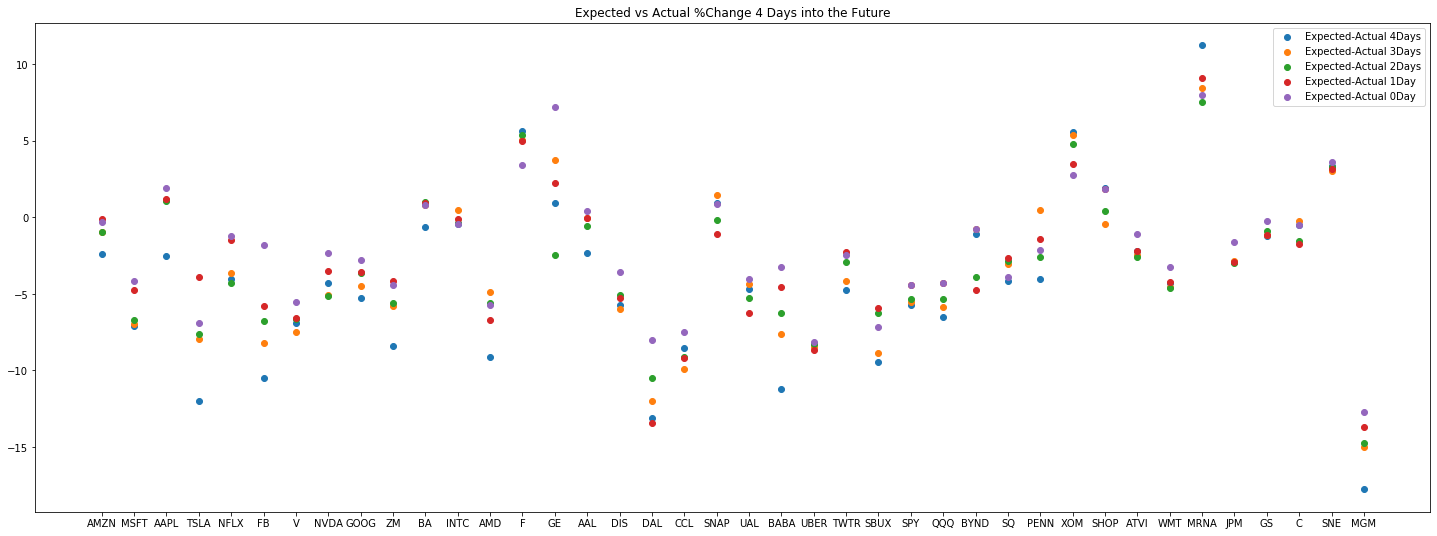

In [22]:
plt.figure(figsize=(25,9))
plt.scatter(Option_Analysis_CPSP4_reset["Tickers"],Option_Analysis_CPSP4_reset["Expected - Actual"], \
            label ="Expected-Actual 4Days")

plt.scatter(Option_Analysis_CPSP3_reset["Tickers"],Option_Analysis_CPSP3_reset["Expected - Actual"],\
            label ="Expected-Actual 3Days")

plt.scatter(Option_Analysis_CPSP2_reset["Tickers"],Option_Analysis_CPSP2_reset["Expected - Actual"],\
            label ="Expected-Actual 2Days")

plt.scatter(Option_Analysis_CPSP1_reset["Tickers"],Option_Analysis_CPSP1_reset["Expected - Actual"],\
            label ="Expected-Actual 1Day")

plt.scatter(Option_Analysis_CPSP0_reset["Tickers"],Option_Analysis_CPSP0_reset["Expected - Actual"],\
            label ="Expected-Actual 0Day")

plt.title("Expected vs Actual %Change 4 Days into the Future")
plt.legend()

In [50]:
emin = min(Option_Analysis_CPSP["Expected %Change"])
amin = min(Option_Analysis_CPSP["Actual %Change"])
mins = [emin, amin]

emax = max(Option_Analysis_CPSP["Expected %Change"])
amax = max(Option_Analysis_CPSP["Actual %Change"])
maxs = [emax, amax]

min_axis = min(mins)
max_axis = max(maxs)

min_max_axis = [min_axis,max_axis]
axiss_final = max(np.abs(min_max_axis))
minaxis = -axiss_final
maxaxis = axiss_final

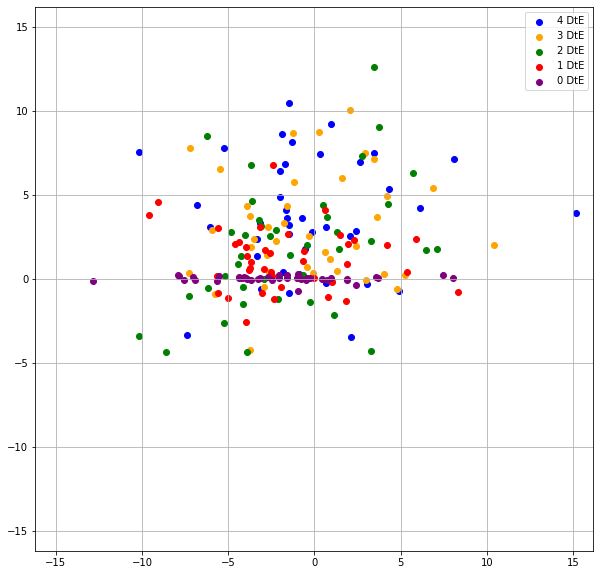

In [51]:
plt.figure(figsize=(10,10))
plt.scatter(Option_Analysis_CPSP4_reset["Expected %Change"], Option_Analysis_CPSP4_reset["Actual %Change"],\
           c="blue",label = "4 DtE")
plt.scatter(Option_Analysis_CPSP3_reset["Expected %Change"], Option_Analysis_CPSP3_reset["Actual %Change"],\
           c="orange",label = "3 DtE")
plt.scatter(Option_Analysis_CPSP2_reset["Expected %Change"], Option_Analysis_CPSP2_reset["Actual %Change"],\
           c="green",label = "2 DtE")
plt.scatter(Option_Analysis_CPSP1_reset["Expected %Change"], Option_Analysis_CPSP1_reset["Actual %Change"],\
           c="red",label = "1 DtE")
plt.scatter(Option_Analysis_CPSP0_reset["Expected %Change"], Option_Analysis_CPSP0_reset["Actual %Change"],\
           c="purple",label = "0 DtE")
plt.gca().set_xlim(minaxis-1,\
                   maxaxis+1)
plt.gca().set_ylim(minaxis-1,\
                   maxaxis+1)
plt.grid()
plt.legend()

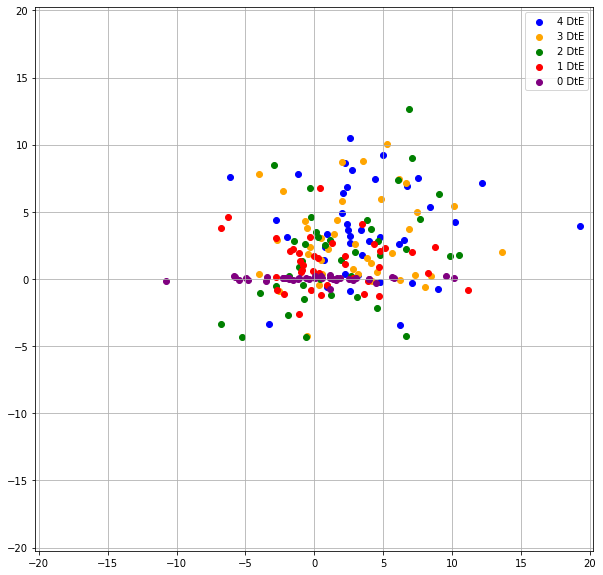

In [55]:

DTE4_m = Option_Analysis_CPSP4_reset["Expected - Actual"].mean()
DTE3_m = Option_Analysis_CPSP3_reset["Expected - Actual"].mean()
DTE2_m = Option_Analysis_CPSP2_reset["Expected - Actual"].mean()
DTE1_m = Option_Analysis_CPSP1_reset["Expected - Actual"].mean()
DTE0_m = Option_Analysis_CPSP0_reset["Expected - Actual"].mean()

Option_Analysis_CPSP4_reset["Expected %Change_Adj"]= Option_Analysis_CPSP4_reset["Expected %Change"]-(DTE4_m)
Option_Analysis_CPSP3_reset["Expected %Change_Adj"]= Option_Analysis_CPSP3_reset["Expected %Change"]-(DTE3_m)
Option_Analysis_CPSP2_reset["Expected %Change_Adj"]= Option_Analysis_CPSP2_reset["Expected %Change"]-(DTE2_m)
Option_Analysis_CPSP1_reset["Expected %Change_Adj"]= Option_Analysis_CPSP1_reset["Expected %Change"]-(DTE1_m)
Option_Analysis_CPSP0_reset["Expected %Change_Adj"]= Option_Analysis_CPSP0_reset["Expected %Change"]-(DTE0_m)

emin = min(Option_Analysis_CPSP4_reset["Expected %Change_Adj"])
amin = min(Option_Analysis_CPSP4_reset["Actual %Change"])
mins = [emin, amin]

emax = max(Option_Analysis_CPSP4_reset["Expected %Change_Adj"])
amax = max(Option_Analysis_CPSP4_reset["Actual %Change"])
maxs = [emax, amax]

min_axis = min(mins)
max_axis = max(maxs)

min_max_axis = [min_axis,max_axis]
axiss_final = max(np.abs(min_max_axis))
minaxis = -axiss_final
maxaxis = axiss_final

plt.figure(figsize=(10,10))
plt.scatter(Option_Analysis_CPSP4_reset["Expected %Change_Adj"],Option_Analysis_CPSP4_reset["Actual %Change"],
           c="blue",label = "4 DtE")
plt.scatter(Option_Analysis_CPSP3_reset["Expected %Change_Adj"],Option_Analysis_CPSP3_reset["Actual %Change"],
           c="orange",label = "3 DtE")
plt.scatter(Option_Analysis_CPSP2_reset["Expected %Change_Adj"],Option_Analysis_CPSP2_reset["Actual %Change"],
           c="green",label = "2 DtE")
plt.scatter(Option_Analysis_CPSP1_reset["Expected %Change_Adj"],Option_Analysis_CPSP1_reset["Actual %Change"],
           c="red",label = "1 DtE")
plt.scatter(Option_Analysis_CPSP0_reset["Expected %Change_Adj"],Option_Analysis_CPSP0_reset["Actual %Change"],
           c="purple",label = "0 DtE")
plt.gca().set_xlim(minaxis-1,\
                   maxaxis+1)
plt.gca().set_ylim(minaxis-1,\
                   maxaxis+1)
plt.grid()
plt.legend()

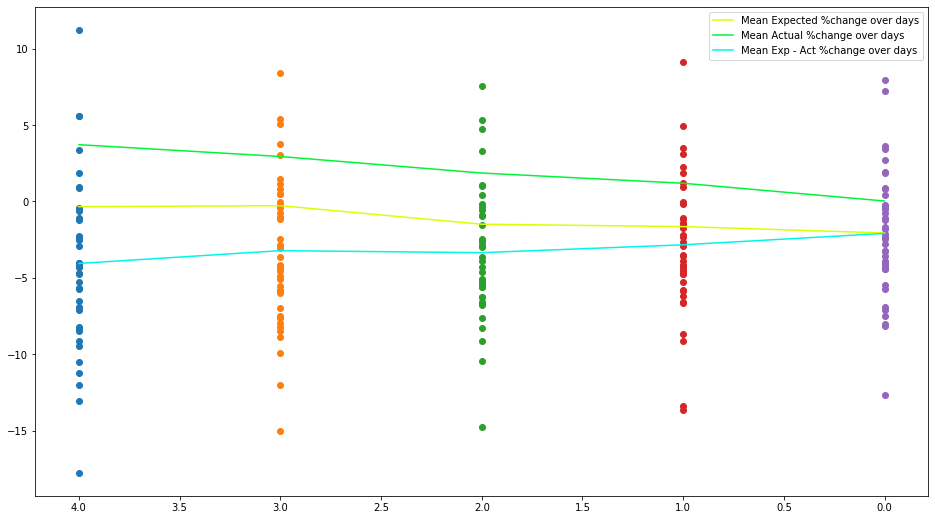

In [25]:
#Plot means over days:
emeans = [Option_Analysis_CPSP4_reset["Expected %Change"].mean(),\
         Option_Analysis_CPSP3_reset["Expected %Change"].mean(),\
         Option_Analysis_CPSP2_reset["Expected %Change"].mean(),\
         Option_Analysis_CPSP1_reset["Expected %Change"].mean(),\
         Option_Analysis_CPSP0_reset["Expected %Change"].mean()]

ameans = [Option_Analysis_CPSP4_reset["Actual %Change"].mean(),\
         Option_Analysis_CPSP3_reset["Actual %Change"].mean(),\
         Option_Analysis_CPSP2_reset["Actual %Change"].mean(),\
         Option_Analysis_CPSP1_reset["Actual %Change"].mean(),\
         Option_Analysis_CPSP0_reset["Actual %Change"].mean()]

eameans = [Option_Analysis_CPSP4_reset["Expected - Actual"].mean(),\
         Option_Analysis_CPSP3_reset["Expected - Actual"].mean(),\
         Option_Analysis_CPSP2_reset["Expected - Actual"].mean(),\
         Option_Analysis_CPSP1_reset["Expected - Actual"].mean(),\
         Option_Analysis_CPSP0_reset["Expected - Actual"].mean()]
days = [Option_Analysis_CPSP4_reset["Days_to_Exp"].mean(),\
         Option_Analysis_CPSP3_reset["Days_to_Exp"].mean(),\
         Option_Analysis_CPSP2_reset["Days_to_Exp"].mean(),\
         Option_Analysis_CPSP1_reset["Days_to_Exp"].mean(),\
         Option_Analysis_CPSP0_reset["Days_to_Exp"].mean()]
plt.figure(figsize=(16,9))
plt.plot(days, emeans, label="Mean Expected %change over days", c="#d9ff03")
plt.plot(days, ameans, label="Mean Actual %change over days", c="#00f539")
plt.plot(days, eameans, label="Mean Exp - Act %change over days", c="#00f5e9")
plt.scatter(Option_Analysis_CPSP4_reset["Days_to_Exp"],Option_Analysis_CPSP4_reset["Expected - Actual"])
plt.scatter(Option_Analysis_CPSP3_reset["Days_to_Exp"],Option_Analysis_CPSP3_reset["Expected - Actual"])
plt.scatter(Option_Analysis_CPSP2_reset["Days_to_Exp"],Option_Analysis_CPSP2_reset["Expected - Actual"])
plt.scatter(Option_Analysis_CPSP1_reset["Days_to_Exp"],Option_Analysis_CPSP1_reset["Expected - Actual"])
plt.scatter(Option_Analysis_CPSP0_reset["Days_to_Exp"],Option_Analysis_CPSP0_reset["Expected - Actual"])
#plt.axhline(eameans[-1], c="orange")
#plt.gca().set_ylim([np.min(means)-1,0.5])
plt.gca().invert_xaxis()
plt.legend()

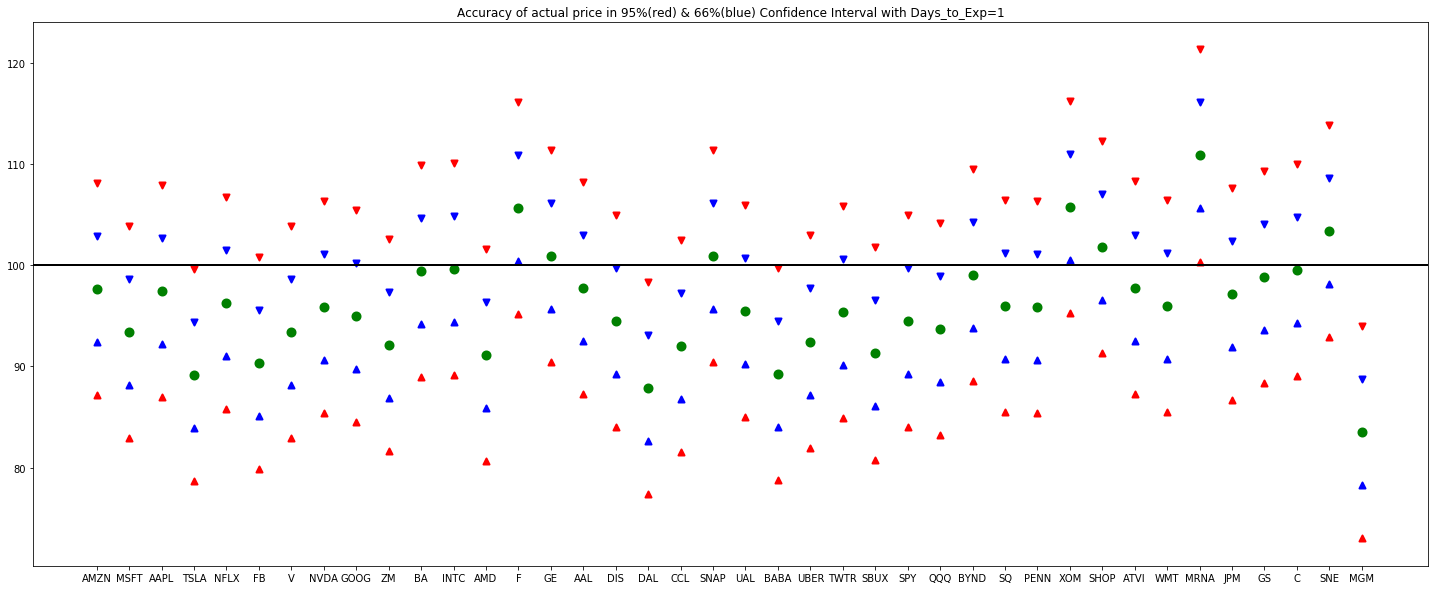

In [26]:
#Prediction_Accuracy_%_Calls_Mid Standard Deviation calc for confidence interval and test run
Option_Analysis_CPSP_graph = Option_Analysis_CPSP4_reset
Analysis_std = Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"].std()

Option_Analysis_CPSP_graph["1sig_left_%pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]-\
                                                  Analysis_std)
Option_Analysis_CPSP_graph["1sig_right_%pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]+\
                                                   Analysis_std)

Option_Analysis_CPSP_graph["2sig_left_%pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]-\
                                                  (2*Analysis_std))
Option_Analysis_CPSP_graph["2sig_right_%pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]+\
                                                   (2*Analysis_std))

Option_Analysis_CPSP_graph["95%CI_left_tail_$_pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]-\
2*Analysis_std)/100*Option_Analysis_CPSP_graph["Actual Price @ Expiry"]
Option_Analysis_CPSP_graph["95%CI_right_tail_$_pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]+\
2*Analysis_std)/100*Option_Analysis_CPSP_graph["Actual Price @ Expiry"]

Option_Analysis_CPSP_graph["66%CI_left_tail_$_pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]-\
Analysis_std)/100*Option_Analysis_CPSP_graph["Actual Price @ Expiry"]
Option_Analysis_CPSP_graph["66%CI_right_tail_$_pred"] = (Option_Analysis_CPSP_graph["Prediction_Accuracy_%_CPSP"]+\
Analysis_std)/100*Option_Analysis_CPSP_graph["Actual Price @ Expiry"]

Option_Analysis_CPSP_graph[["Tickers","CPSP","Actual Price @ Expiry","Expected - Actual",\
                      "95%CI_left_tail_$_pred","95%CI_right_tail_$_pred",\
                      "66%CI_left_tail_$_pred","66%CI_right_tail_$_pred"]]

plt.figure(figsize=(25,10))
for x in Option_Analysis_CPSP_graph["Tickers"]:
    
    graphing = Option_Analysis_CPSP_graph.loc[lambda Option_Analysis_CPSP_graph: \
                                           Option_Analysis_CPSP_graph['Tickers']== x, :]
    
    plt.scatter(graphing["Tickers"],graphing["Prediction_Accuracy_%_CPSP"],c="green",linewidths=4)
    plt.scatter(graphing["Tickers"],graphing["2sig_left_%pred"], c="r", marker="^",linewidths=2)
    plt.scatter(graphing["Tickers"],graphing["2sig_right_%pred"], c="r", marker="v",linewidths=2)
    plt.scatter(graphing["Tickers"],graphing["1sig_left_%pred"], c="b", marker="^",linewidths=2)
    plt.scatter(graphing["Tickers"],graphing["1sig_right_%pred"], c="b", marker="v",linewidths=2)
    plt.axhline(y=100, c="k")
    plt.title("Accuracy of actual price in 95%(red) & 66%(blue) Confidence Interval with Days_to_Exp=1")
    plt.show


In [62]:
ePredictions = []
aPredictions = []

for x in Option_Analysis_CPSP4_reset["Expected %Change_Adj"]:
    if x > 0:
        ePredictions.append("positive")
    else: 
        ePredictions.append("negative")
        
for x in Option_Analysis_CPSP4_reset["Actual %Change"]:
    if x > 0:
        aPredictions.append("positive")
    else: 
        aPredictions.append("negative")
        
Prediction = []        
for x,y in zip(ePredictions, aPredictions):
    if x == y:
        Prediction.append("Correct")
    else: 
        Prediction.append("False")

print(Prediction.count("Correct"))
print(Prediction.count("False"))
Option_Analysis_CPSP4_reset["predicted Direction"] = Prediction
Option_Analysis_CPSP4_reset[["Tickers","Days_to_Exp","Price @ DtE","CPSP_Adj", "Actual Price @ Expiry",\
                             "Expected %Change_Adj","Actual %Change","predicted Direction" ]]

30
10


,Tickers,Days_to_Exp,Price @ DtE,CPSP_Adj,Actual Price @ Expiry,Expected %Change_Adj,Actual %Change,predicted Direction
0,AMZN,4,3299.659912,3457.002084,3401.800049,4.740783,3.095475,Correct
1,MSFT,4,213.080002,222.425076,228.910004,4.372990,7.429135,Correct
2,AAPL,4,502.204987,506.279598,499.230011,0.938068,-0.592383,False
3,TSLA,4,2003.000000,2053.155595,2213.399902,2.564711,10.504239,Correct
4,NFLX,4,487.309998,524.789246,523.890015,7.549378,7.506519,Correct
5,FB,4,270.339996,276.079092,293.660004,2.198473,8.626177,Correct
6,V,4,205.630005,209.665379,215.710007,2.044260,4.902009,Correct
7,NVDA,4,507.549988,524.464656,525.909973,3.360974,3.617375,Correct
8,GOOG,4,1586.790039,1624.568641,1644.410034,2.446313,3.631230,Correct
9,ZM,4,281.220001,286.885277,299.269989,2.094319,6.418458,Correct


In [41]:
twosig_left = []
for x,y in zip(Option_Analysis_CPSP["95%CI_left_tail_$_pred"],Option_Analysis_CPSP["Actual_Price_@_Exp"]):
    if x<y:
        twosig_left.append("in interval")
    else:
        twosig_left.append("out of interval")


twosig_right = []
for x,y in zip(Option_Analysis_CPSP["95%CI_right_tail_$_pred"],Option_Analysis_CPSP["Actual_Price_@_Exp"]):
    if x>y:
        twosig_right.append("in interval")
    else:
        twosig_right.append("out of interval")


PP_in_2sig_interval =[]
for x,y in zip(twosig_left,twosig_right):
    if x == 'in interval' and y == 'in interval':
        PP_in_2sig_interval.append("Y")
    else:
        PP_in_2sig_interval.append("N")
    
Option_Analysis_CPSP["AP_in_PP_2sig_Interval"]= PP_in_2sig_interval


onesig_left = []
for x,y in zip(Option_Analysis_CPSP["66%CI_left_tail_$_pred"],Option_Analysis_CPSP["Actual_Price_@_Exp"]):
    if x<y:
        onesig_left.append("in interval")
    else:
        onesig_left.append("out of interval")


onesig_right = []
for x,y in zip(Option_Analysis_CPSP["66%CI_right_tail_$_pred"],Option_Analysis_CPSP["Actual_Price_@_Exp"]):
    if x>y:
        onesig_right.append("in interval")
    else:
        onesig_right.append("out of interval")


PP_in_1sig_interval =[]
for x,y in zip(onesig_left,onesig_right):
    if x == 'in interval' and y == 'in interval':
        PP_in_1sig_interval.append("IN")
    else:
        PP_in_1sig_interval.append("OUT")
    
Option_Analysis_CPSP["AP_in_PP_2sig_Interval"]= PP_in_2sig_interval
Option_Analysis_CPSP["AP_in_PP_1sig_Interval"]= PP_in_1sig_interval

/Users/xpatricklorenzx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xpatricklorenzx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:50: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/Users/xpatricklorenzx/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:51: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

Se

In [42]:
#summarize intervals in one colummn each
Option_Analysis_CPSP_2sig_PP = Option_Analysis_CPSP[["Tickers","CP_in_S&P_moves","Actual_Price_@_Exp",\
                                                     "95%CI_left_tail_$_pred","95%CI_right_tail_$_pred",\
                                                     "AP_in_PP_2sig_Interval"]]
Option_Analysis_CPSP_1sig_PP = Option_Analysis_CPSP[["Tickers","CP_in_S&P_moves","Actual_Price_@_Exp",\
                                                     "66%CI_left_tail_$_pred","66%CI_right_tail_$_pred",\
                                                     "AP_in_PP_1sig_Interval"]]

In [43]:
Option_Analysis_CPSP_1sig_PP

,Tickers,CP_in_S&P_moves,Actual_Price_@_Exp,66%CI_left_tail_$_pred,66%CI_right_tail_$_pred,AP_in_PP_1sig_Interval
0,AMZN,3175.171617,3297.370117,2877.436001,3472.907233,IN
1,AAPL,446.330676,473.100006,403.612171,489.049181,IN
2,TSLA,1730.106035,2001.829956,1549.351053,1910.861016,OUT
3,NFLX,496.514131,497.899994,451.556314,541.471948,IN
4,FB,250.802485,269.010010,226.512260,275.092709,IN
5,V,198.676371,204.149994,180.242673,217.110069,IN
6,NVDA,466.167180,485.640015,422.316377,510.017983,IN
7,GOOG,1523.341283,1581.750000,1380.517367,1666.165198,IN
8,BA,201.731151,169.580002,186.418947,217.043356,OUT
9,INTC,53.972182,49.169998,49.532384,58.411981,OUT


In [44]:
Option_Analysis_CPSP_2sig_PP

,Tickers,CP_in_S&P_moves,Actual_Price_@_Exp,95%CI_left_tail_$_pred,95%CI_right_tail_$_pred,AP_in_PP_2sig_Interval
0,AMZN,3175.171617,3297.370117,2579.700385,3770.642849,Y
1,AAPL,446.330676,473.100006,360.893666,531.767686,Y
2,TSLA,1730.106035,2001.829956,1368.596071,2091.615998,Y
3,NFLX,496.514131,497.899994,406.598498,586.429765,Y
4,FB,250.802485,269.010010,202.222035,299.382934,Y
5,V,198.676371,204.149994,161.808975,235.543766,Y
6,NVDA,466.167180,485.640015,378.465573,553.868787,Y
7,GOOG,1523.341283,1581.750000,1237.693452,1808.989113,Y
8,BA,201.731151,169.580002,171.106742,232.355561,N
9,INTC,53.972182,49.169998,45.092585,62.851780,Y


In [51]:
tickerp = yf.download("TSLA", start= "2020-08-28")
ticker_p = tickerp['Close']
ticker_t_p = ticker_p[-1]
ticker_t_p

[*********************100%***********************]  1 of 1 completed


2213.39990234375